# Import các thư viện

In [33]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from ucimlrepo import fetch_ucirepo
from graphviz import Source
from IPython.display import display, Image
import seaborn as sns
import category_encoders as ce

# Heart Desease Dataset

### 1. Train và test dataset

In [34]:
# Fetch Heart Disease dataset
heart_disease = fetch_ucirepo(id=45)

# Extract features and labels
features = heart_disease.data.features.values
labels = np.ravel(heart_disease.data.targets)

# Convert labels to binary: 0 (no disease), 1 (disease)
labels_binary = np.where(labels > 0, 1, 0)

# Handle missing values
data = pd.concat([pd.DataFrame(features, columns=heart_disease.data.features.columns), pd.Series(labels_binary, name='num')], axis=1)
data = data.dropna().reset_index(drop=True)
features = data.iloc[:, :-1].values
labels_binary = data.iloc[:, -1].values

# Encode the target variable (though not strictly necessary for binary 0/1)
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels_binary)

# Define class names for binary classification
class_names = ['No Disease', 'Disease']

# Define train/test split proportions
split_ratios = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]

subsets = []

for split_ratio in split_ratios:
    feature_train, feature_test, label_train, label_test = train_test_split(
        features, labels_encoded, test_size=split_ratio[1], random_state=42, stratify=labels_encoded
    )
    
    subsets.append({
        'feature_train': feature_train,
        'label_train': label_train,
        'feature_test': feature_test,
        'label_test': label_test
    })

### 2. Visualization

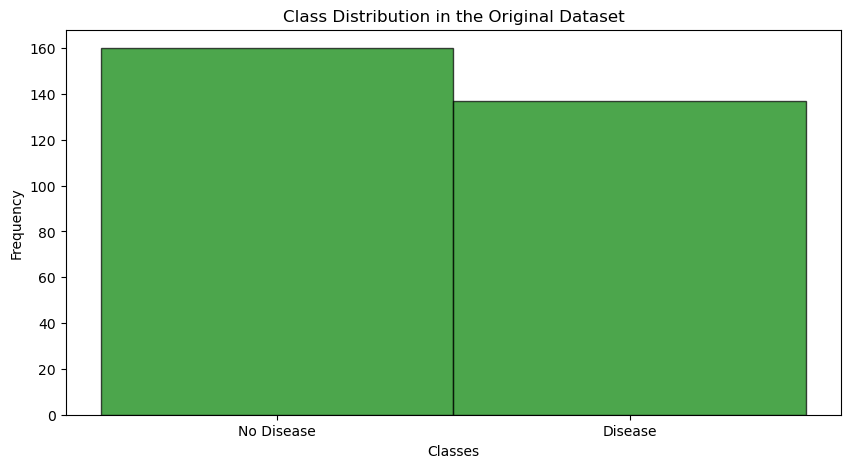

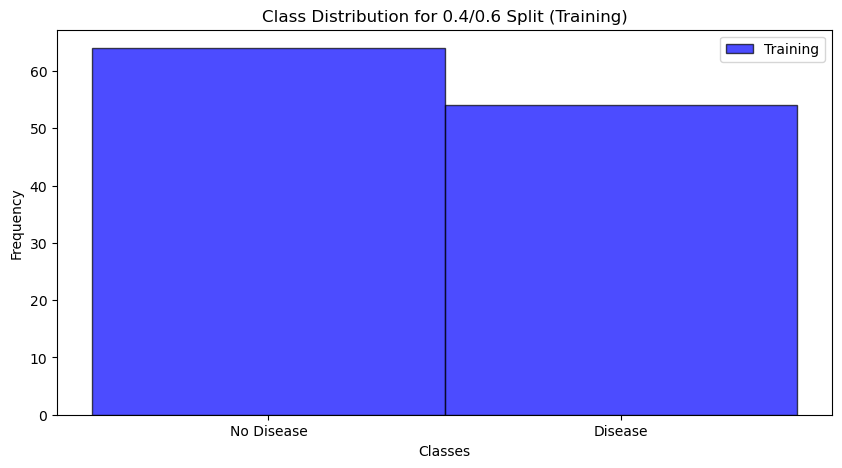

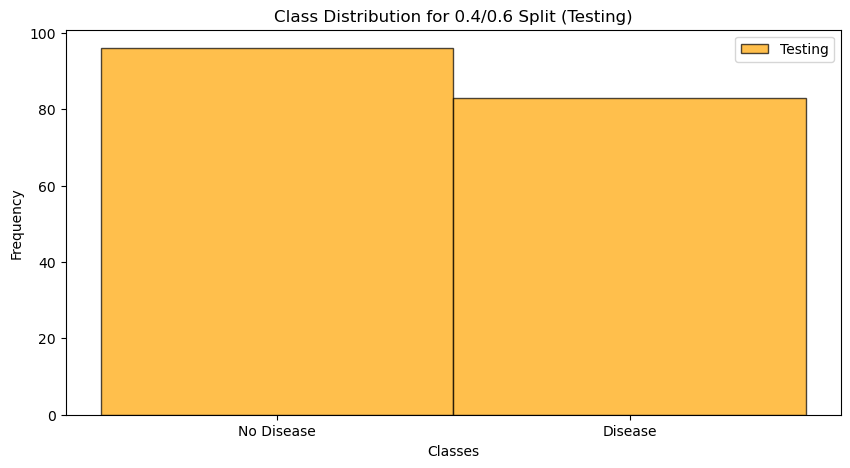

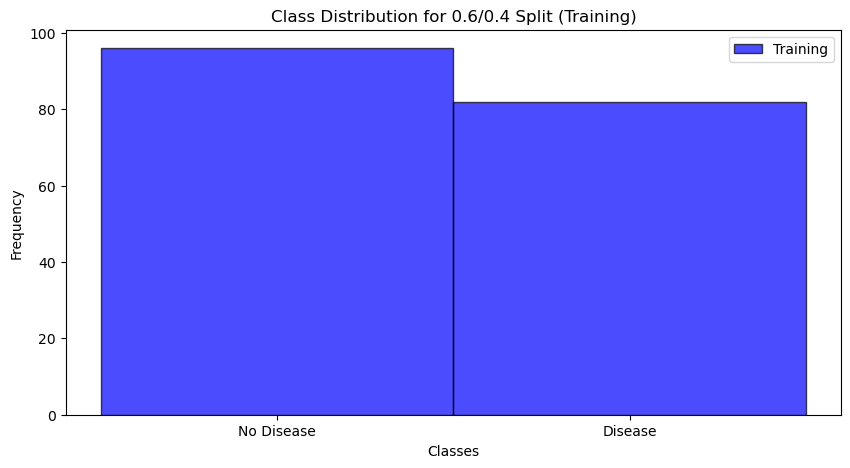

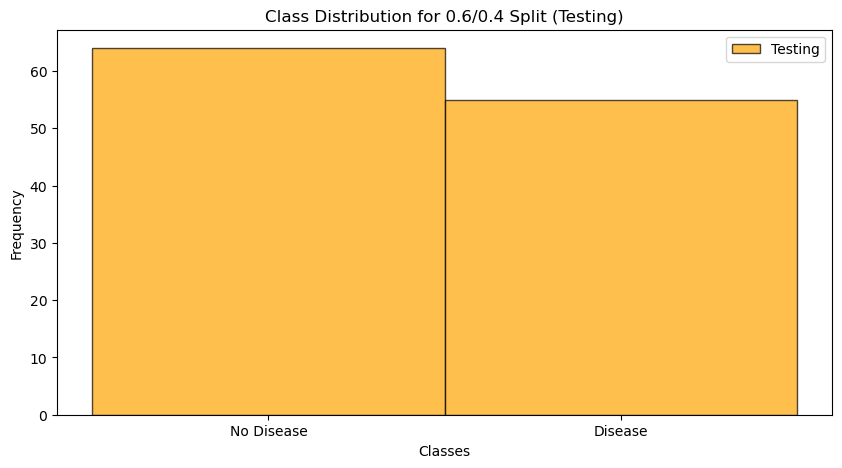

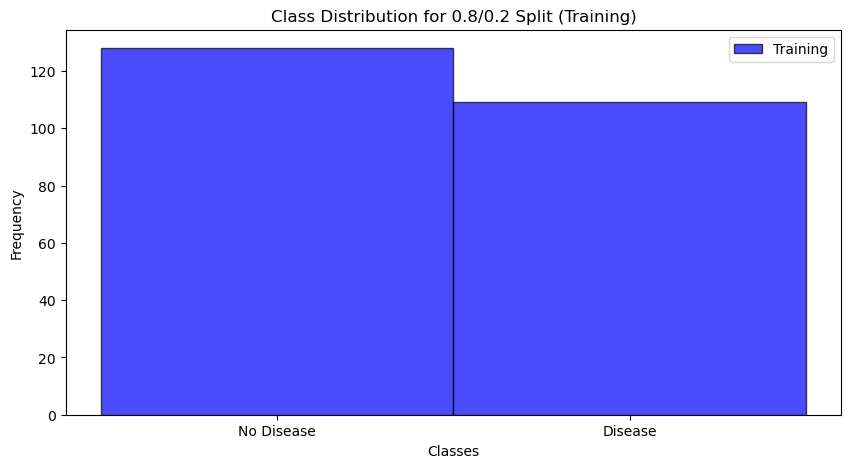

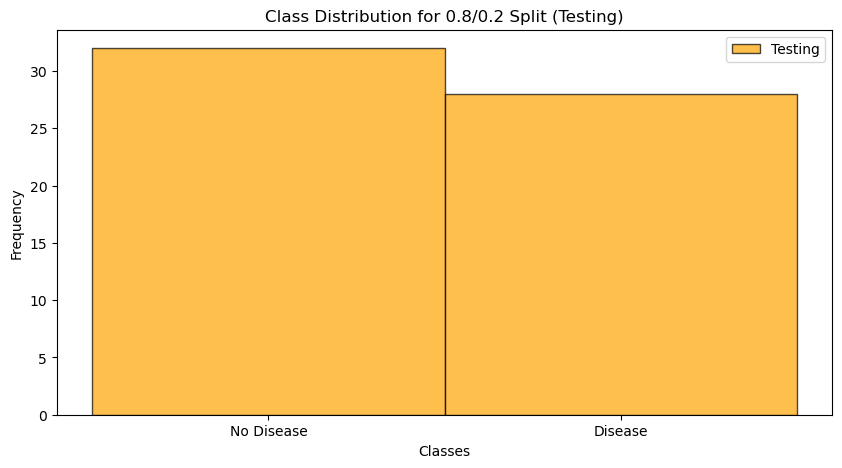

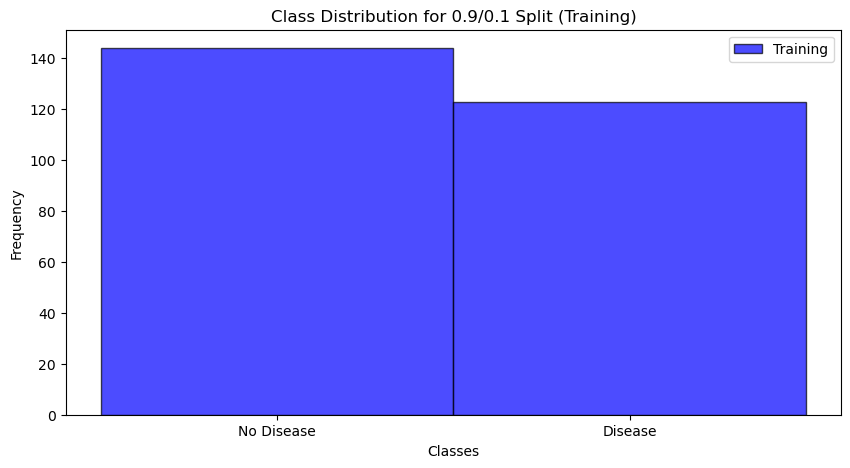

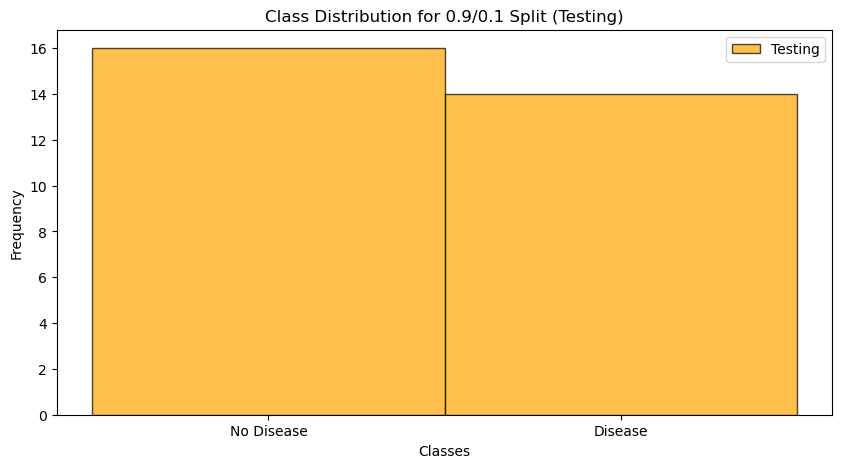

In [35]:
# Visualize the class distribution in the original dataset
plt.figure(figsize=(10, 5))
bins = np.arange(len(np.unique(labels_encoded)) + 1) - 0.5
plt.hist(labels_encoded, bins=bins, color="green", alpha=0.7, edgecolor="black")
plt.title("Class Distribution in the Original Dataset")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.xticks(np.arange(len(class_names)), class_names)
plt.show()

# Visualize distributions for each train/test split
for i in range(len(subsets)):
    label_train = subsets[i]['label_train']
    label_test = subsets[i]['label_test']

    bins = np.arange(len(np.unique(labels_encoded)) + 1) - 0.5
    
    plt.figure(figsize=(10, 5))
    plt.hist(label_train, bins=bins, color="blue", alpha=0.7, edgecolor="black", label="Training")
    plt.title(f"Class Distribution for {split_ratios[i][0]}/{split_ratios[i][1]} Split (Training)")
    plt.xlabel("Classes")
    plt.ylabel("Frequency")
    plt.xticks(np.arange(len(class_names)), class_names)
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10, 5))
    plt.hist(label_test, bins=bins, color="orange", alpha=0.7, edgecolor="black", label="Testing")
    plt.title(f"Class Distribution for {split_ratios[i][0]}/{split_ratios[i][1]} Split (Testing)")
    plt.xlabel("Classes")
    plt.ylabel("Frequency")
    plt.xticks(np.arange(len(class_names)), class_names)
    plt.legend()
    plt.show()

### 3. Train model

In [36]:
# Train and evaluate the Decision Tree model using Entropy (Information Gain)
models = []
for i, subset in enumerate(subsets):
    feature_train = subset['feature_train']
    label_train = subset['label_train']
    # model = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=5, class_weight='balanced')
    model = DecisionTreeClassifier(criterion='entropy', random_state=42)
    model.fit(feature_train, label_train)
    models.append(model)

### 4. Visualization

Decision tree of the model trained with split ratio 0.4/0.6



(process:22152): Pango-CRITICAL **: 00:44:20.204: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:22152): Pango-CRITICAL **: 00:44:20.204: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:22152): Pango-CRITICAL **: 00:44:20.205: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:22152): Pango-CRITICAL **: 00:44:20.205: pango_font_description_get_family: assertion 'desc != NULL' failed


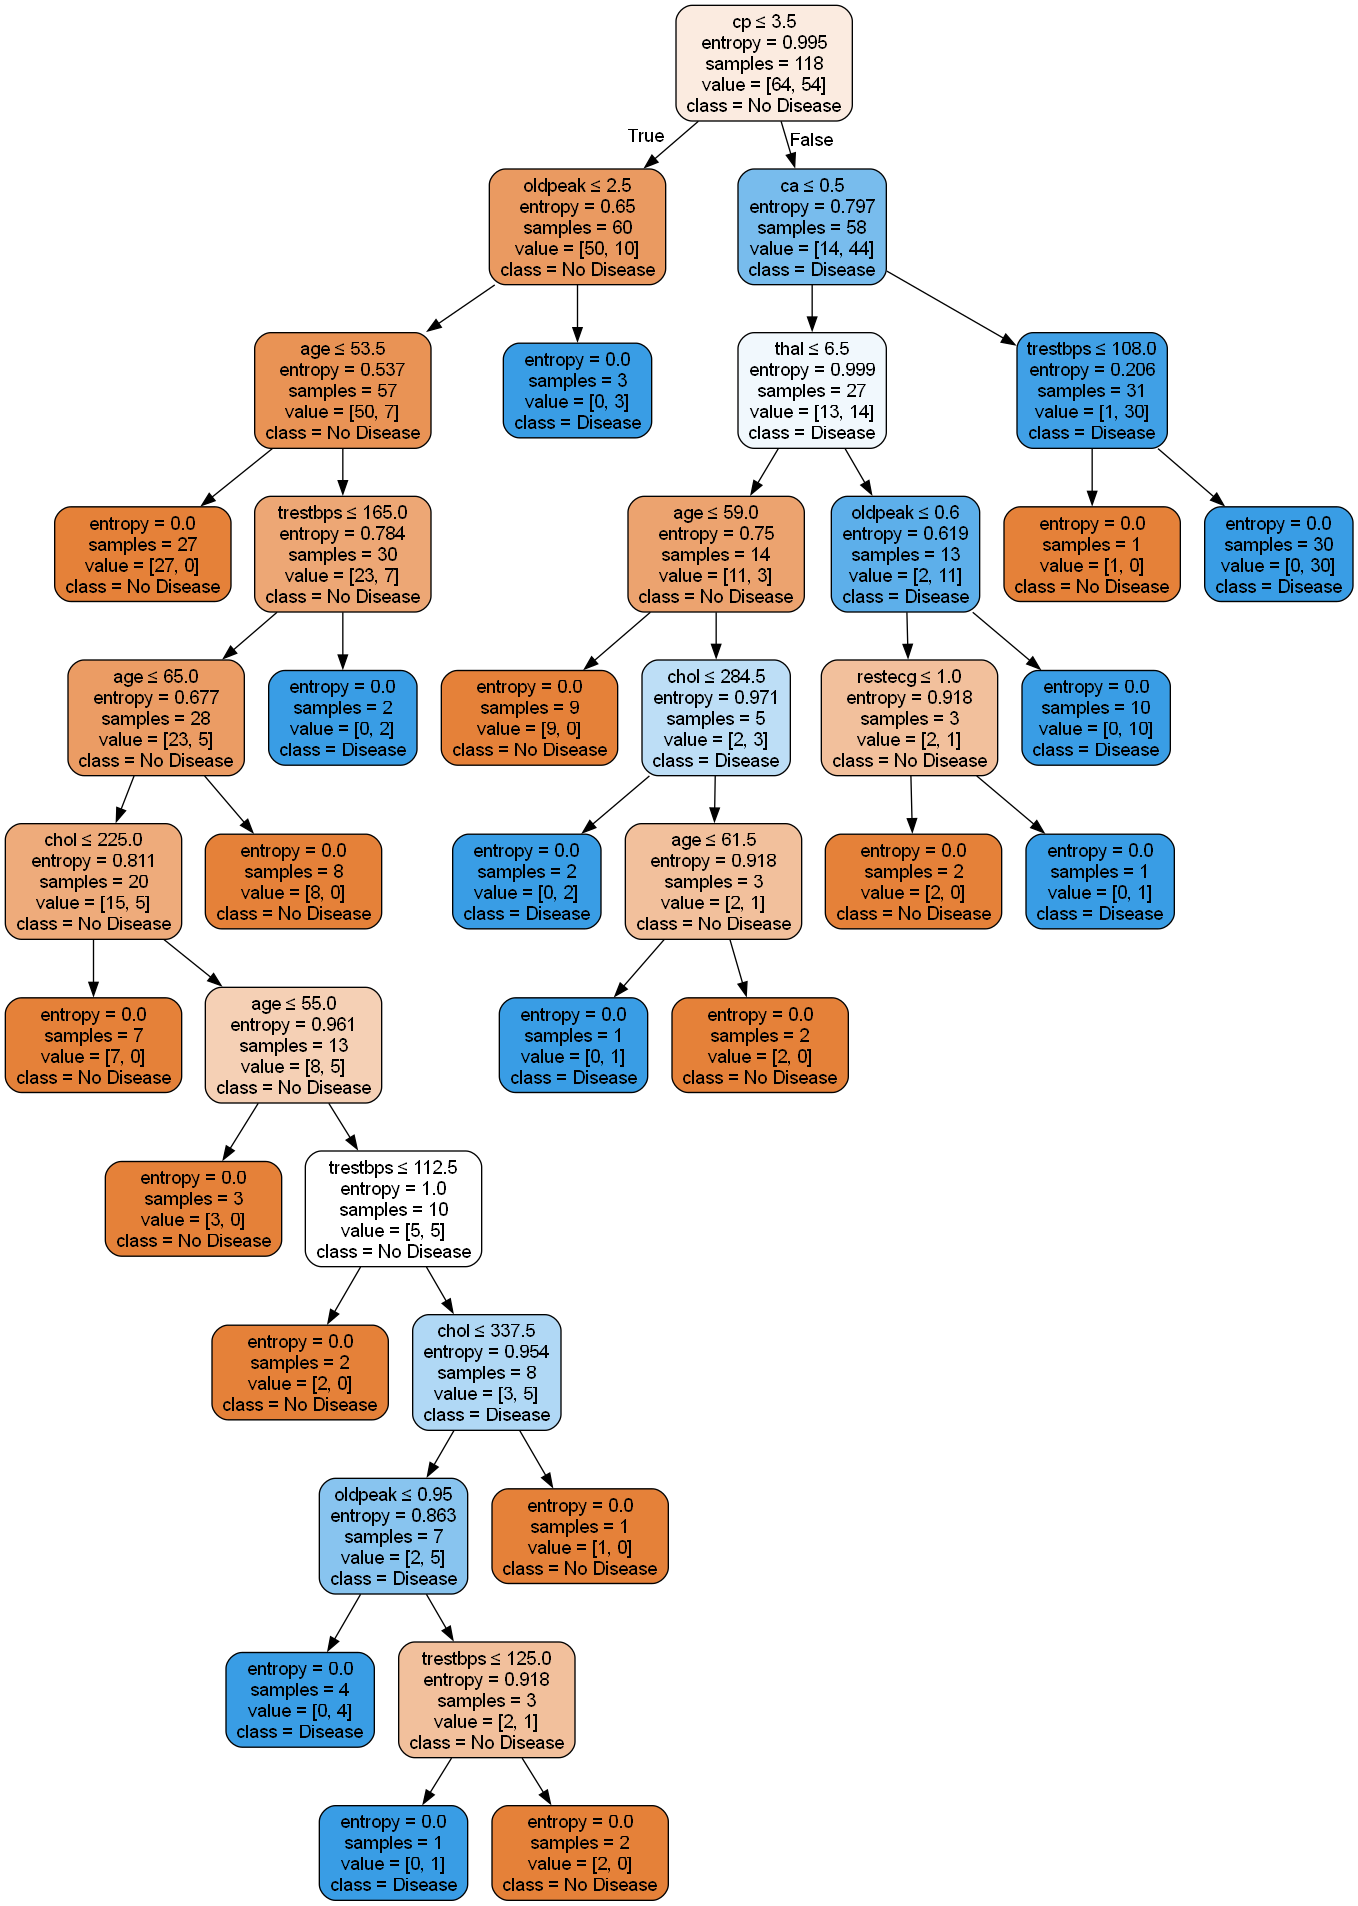

Decision tree of the model trained with split ratio 0.6/0.4



(process:6464): Pango-CRITICAL **: 00:44:21.301: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:6464): Pango-CRITICAL **: 00:44:21.301: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:6464): Pango-CRITICAL **: 00:44:21.301: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:6464): Pango-CRITICAL **: 00:44:21.301: pango_font_description_get_family: assertion 'desc != NULL' failed


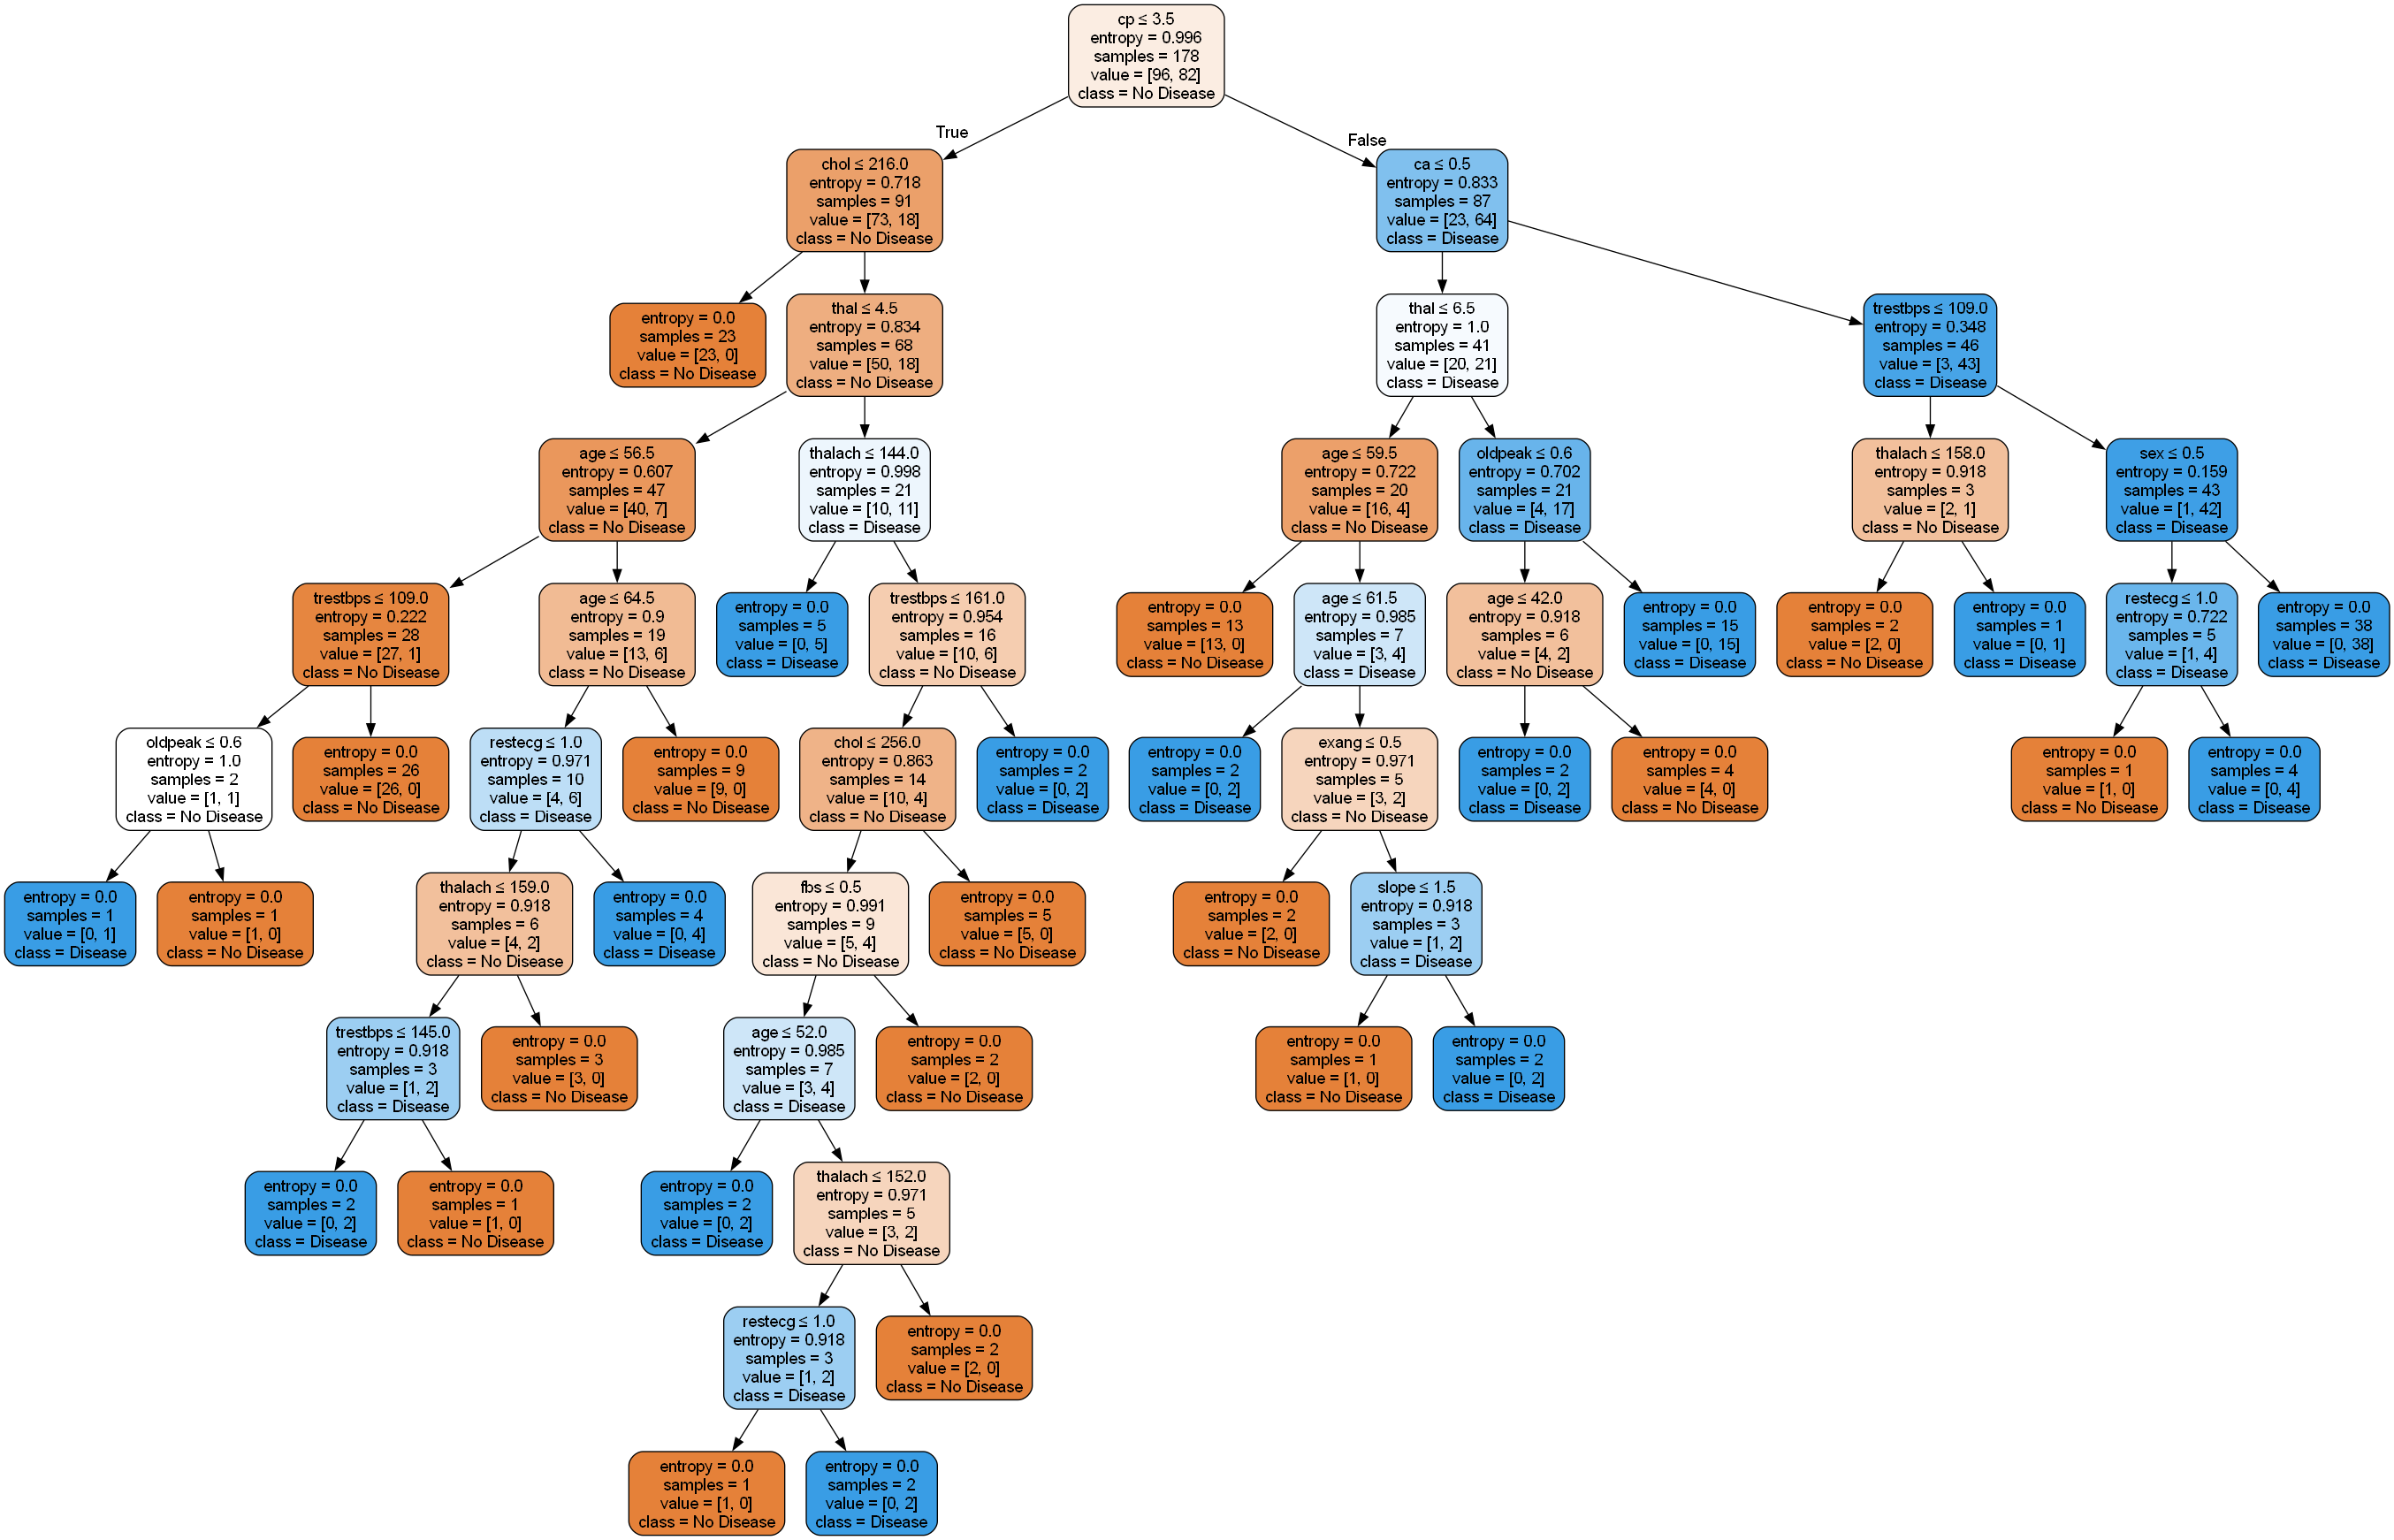

Decision tree of the model trained with split ratio 0.8/0.2



(process:4812): Pango-CRITICAL **: 00:44:22.599: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:4812): Pango-CRITICAL **: 00:44:22.599: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:4812): Pango-CRITICAL **: 00:44:22.599: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:4812): Pango-CRITICAL **: 00:44:22.599: pango_font_description_get_family: assertion 'desc != NULL' failed


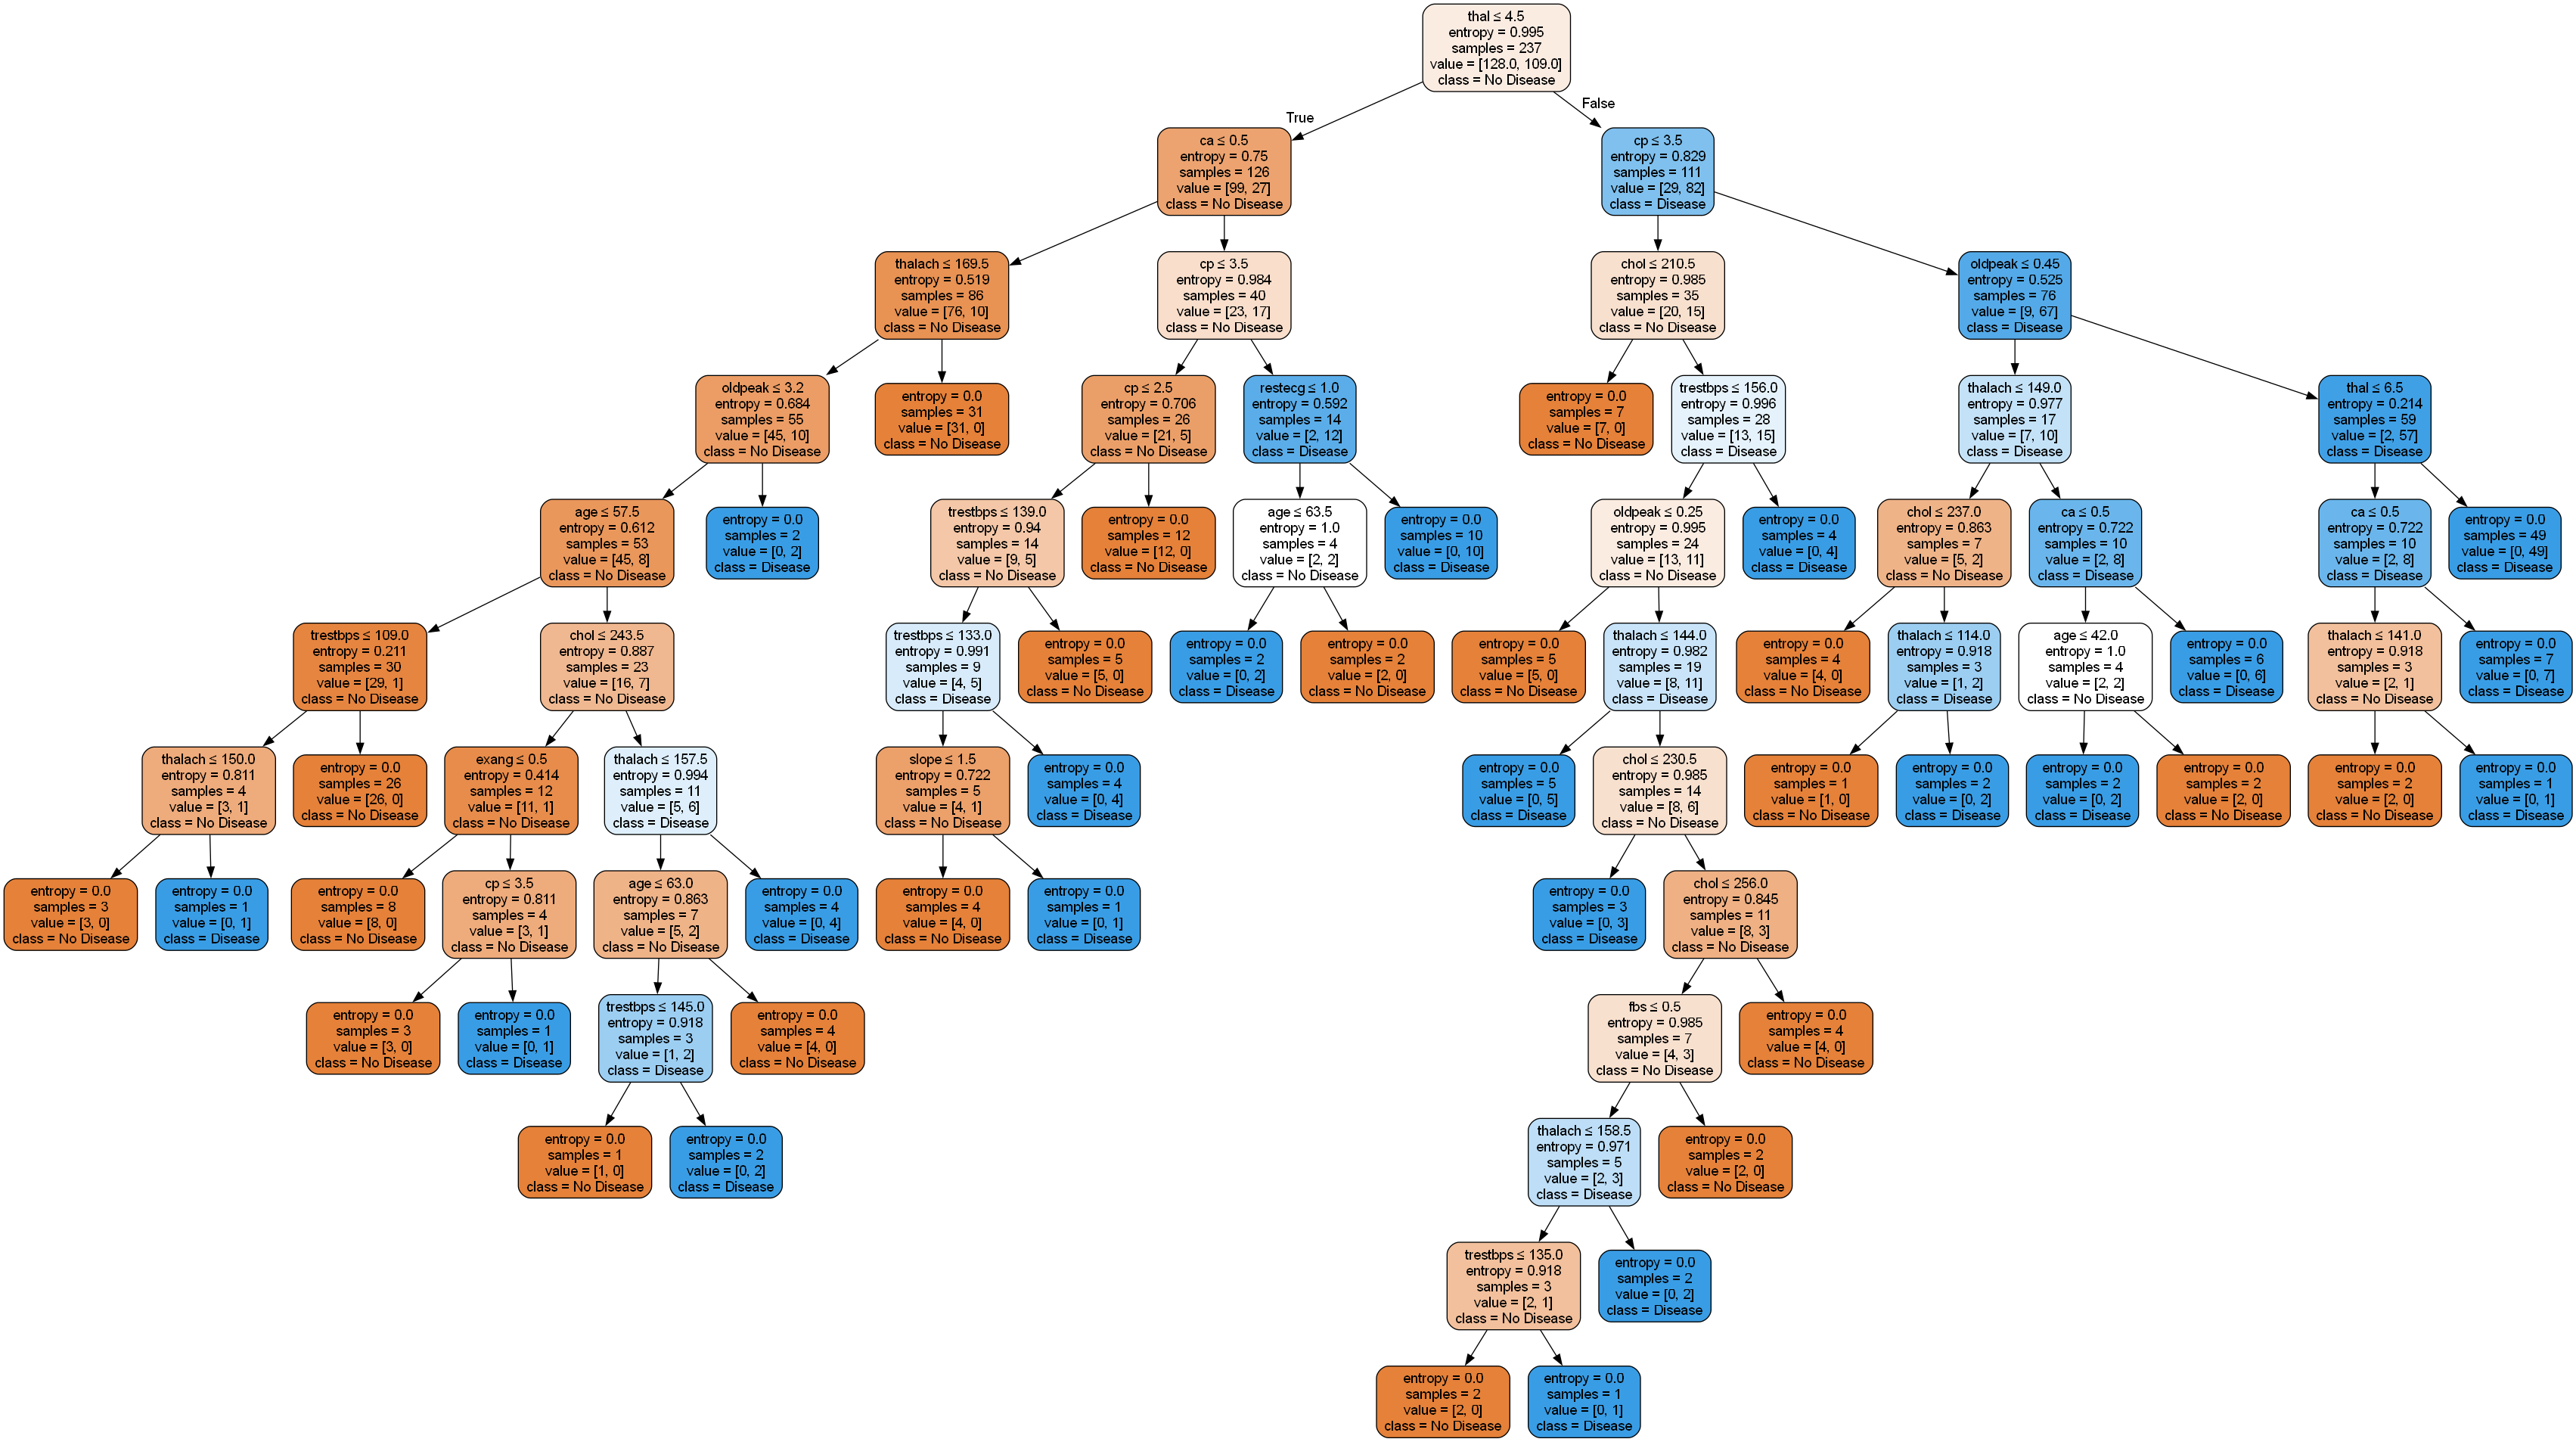

Decision tree of the model trained with split ratio 0.9/0.1



(process:17800): Pango-CRITICAL **: 00:44:24.289: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:17800): Pango-CRITICAL **: 00:44:24.289: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:17800): Pango-CRITICAL **: 00:44:24.289: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:17800): Pango-CRITICAL **: 00:44:24.289: pango_font_description_get_family: assertion 'desc != NULL' failed


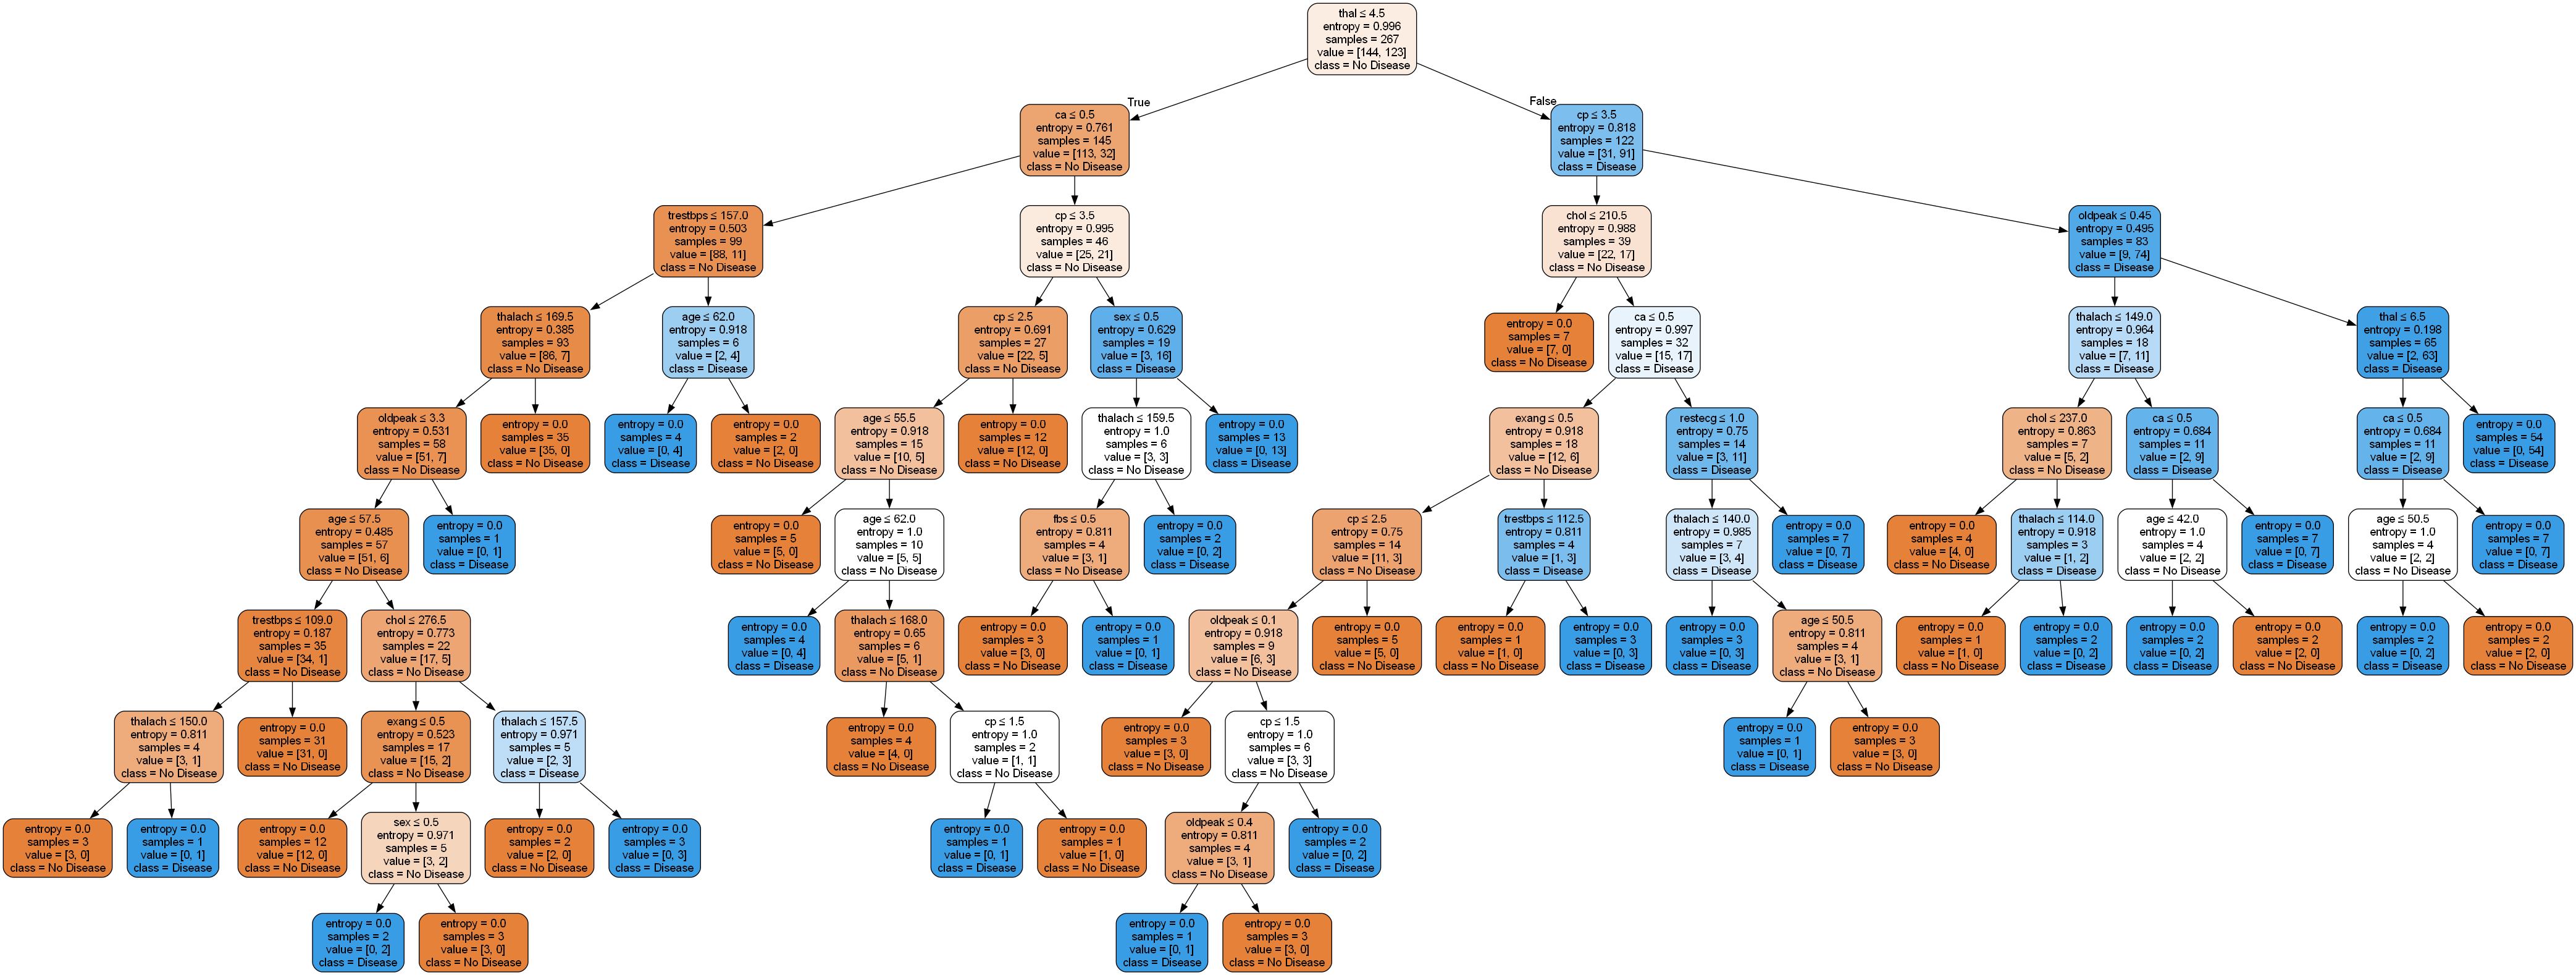

In [37]:
for i in range(len(models)):
    print(f"Decision tree of the model trained with split ratio {split_ratios[i][0]}/{split_ratios[i][1]}")
    # Export the decision tree to DOT format
    dot_data = export_graphviz(
        models[i],  # Use the correct model from the list
        out_file=None,  # Don't save to file, we will use the source in memory
        feature_names=heart_disease.data.features.columns.values,  # Use Heart Disease feature names
        class_names=class_names,  # Convert class names to strings
        filled=True,
        rounded=True,
        special_characters=True,
        fontname="Arial"
    )
    
    # Render the DOT file with Graphviz
    graph = Source(dot_data)
    # Visualize the tree
    graph.render(f"./tree/tree1/tree_{split_ratios[i][0]}_{split_ratios[i][1]}", 
                 format='png', 
                 cleanup=True)
    display(Image(f"./tree/tree1/tree_{split_ratios[i][0]}_{split_ratios[i][1]}.png"))

### 5. Đánh giá Decision Tree

Split (0.4, 0.6) Class Distribution in Test Set:
0    96
1    83
Name: count, dtype: int64
Classification Report for 0.4/0.6 Split:
              precision    recall  f1-score   support

  No Disease       0.77      0.82      0.80        96
     Disease       0.78      0.72      0.75        83

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



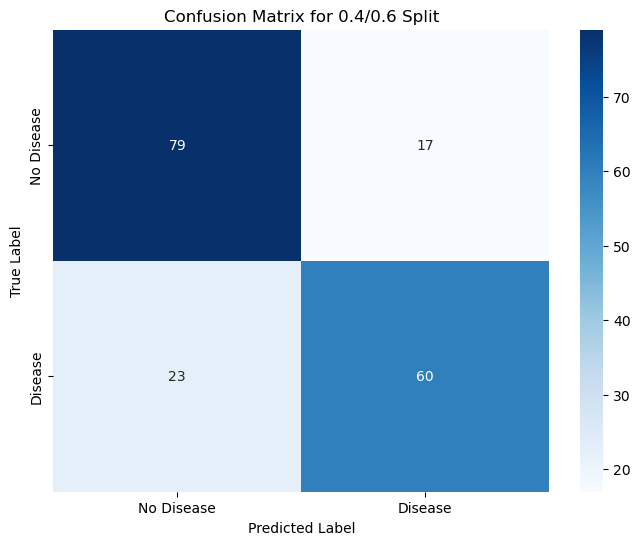

Split (0.6, 0.4) Class Distribution in Test Set:
0    64
1    55
Name: count, dtype: int64
Classification Report for 0.6/0.4 Split:
              precision    recall  f1-score   support

  No Disease       0.72      0.86      0.79        64
     Disease       0.79      0.62      0.69        55

    accuracy                           0.75       119
   macro avg       0.76      0.74      0.74       119
weighted avg       0.75      0.75      0.74       119



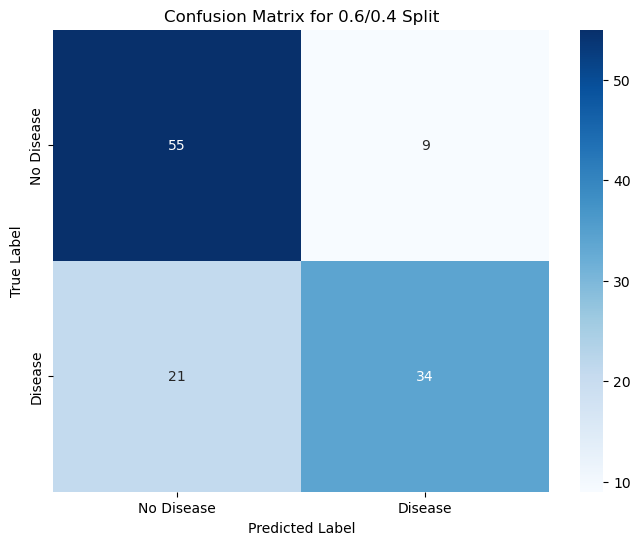

Split (0.8, 0.2) Class Distribution in Test Set:
0    32
1    28
Name: count, dtype: int64
Classification Report for 0.8/0.2 Split:
              precision    recall  f1-score   support

  No Disease       0.80      0.75      0.77        32
     Disease       0.73      0.79      0.76        28

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



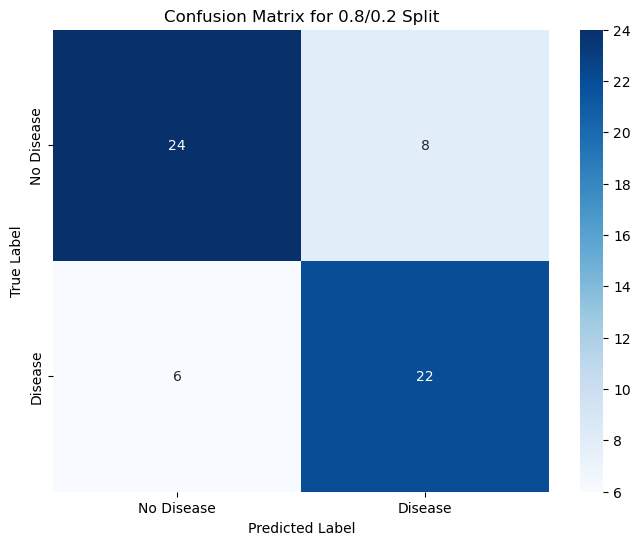

Split (0.9, 0.1) Class Distribution in Test Set:
0    16
1    14
Name: count, dtype: int64
Classification Report for 0.9/0.1 Split:
              precision    recall  f1-score   support

  No Disease       0.68      0.81      0.74        16
     Disease       0.73      0.57      0.64        14

    accuracy                           0.70        30
   macro avg       0.71      0.69      0.69        30
weighted avg       0.70      0.70      0.69        30



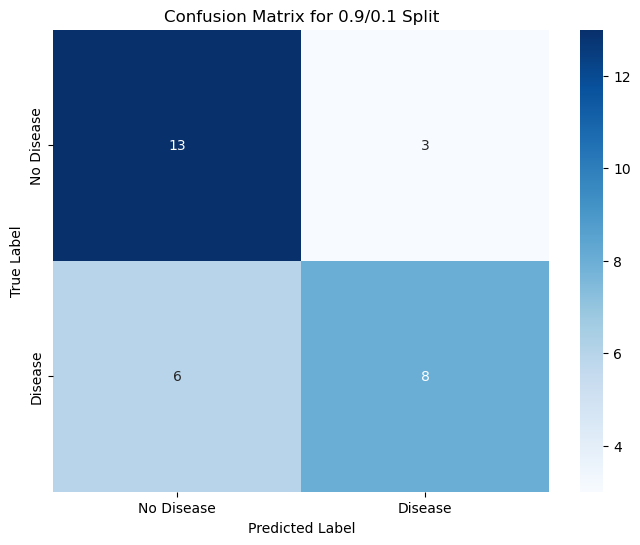

In [38]:
# For each model and split, make predictions, generate a report, and confusion matrix
for i, subset in enumerate(subsets):
    feature_train = subset['feature_train']
    label_train = subset['label_train']
    feature_test = subset['feature_test']
    label_test = subset['label_test']
    
    # Make predictions
    label_pred = models[i].predict(feature_test)
    
    # Print class distribution in test set
    print(f"Split {split_ratios[i]} Class Distribution in Test Set:")
    print(pd.Series(label_test).value_counts())
    
    # Generate classification report
    print(f"Classification Report for {split_ratios[i][0]}/{split_ratios[i][1]} Split:")
    print(classification_report(label_test, label_pred, target_names=class_names, zero_division=0))
    
    # Generate confusion matrix
    cm = confusion_matrix(label_test, label_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix for {split_ratios[i][0]}/{split_ratios[i][1]} Split")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

### 6. Độ sâu (depth) và độ chính xác (accuracy) của Decision Tree

#### 6.1 Visualization

Decision tree of the model trained with split ratio 80/20 and max depth None



(process:6612): Pango-CRITICAL **: 00:44:28.063: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:6612): Pango-CRITICAL **: 00:44:28.063: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:6612): Pango-CRITICAL **: 00:44:28.063: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:6612): Pango-CRITICAL **: 00:44:28.063: pango_font_description_get_family: assertion 'desc != NULL' failed


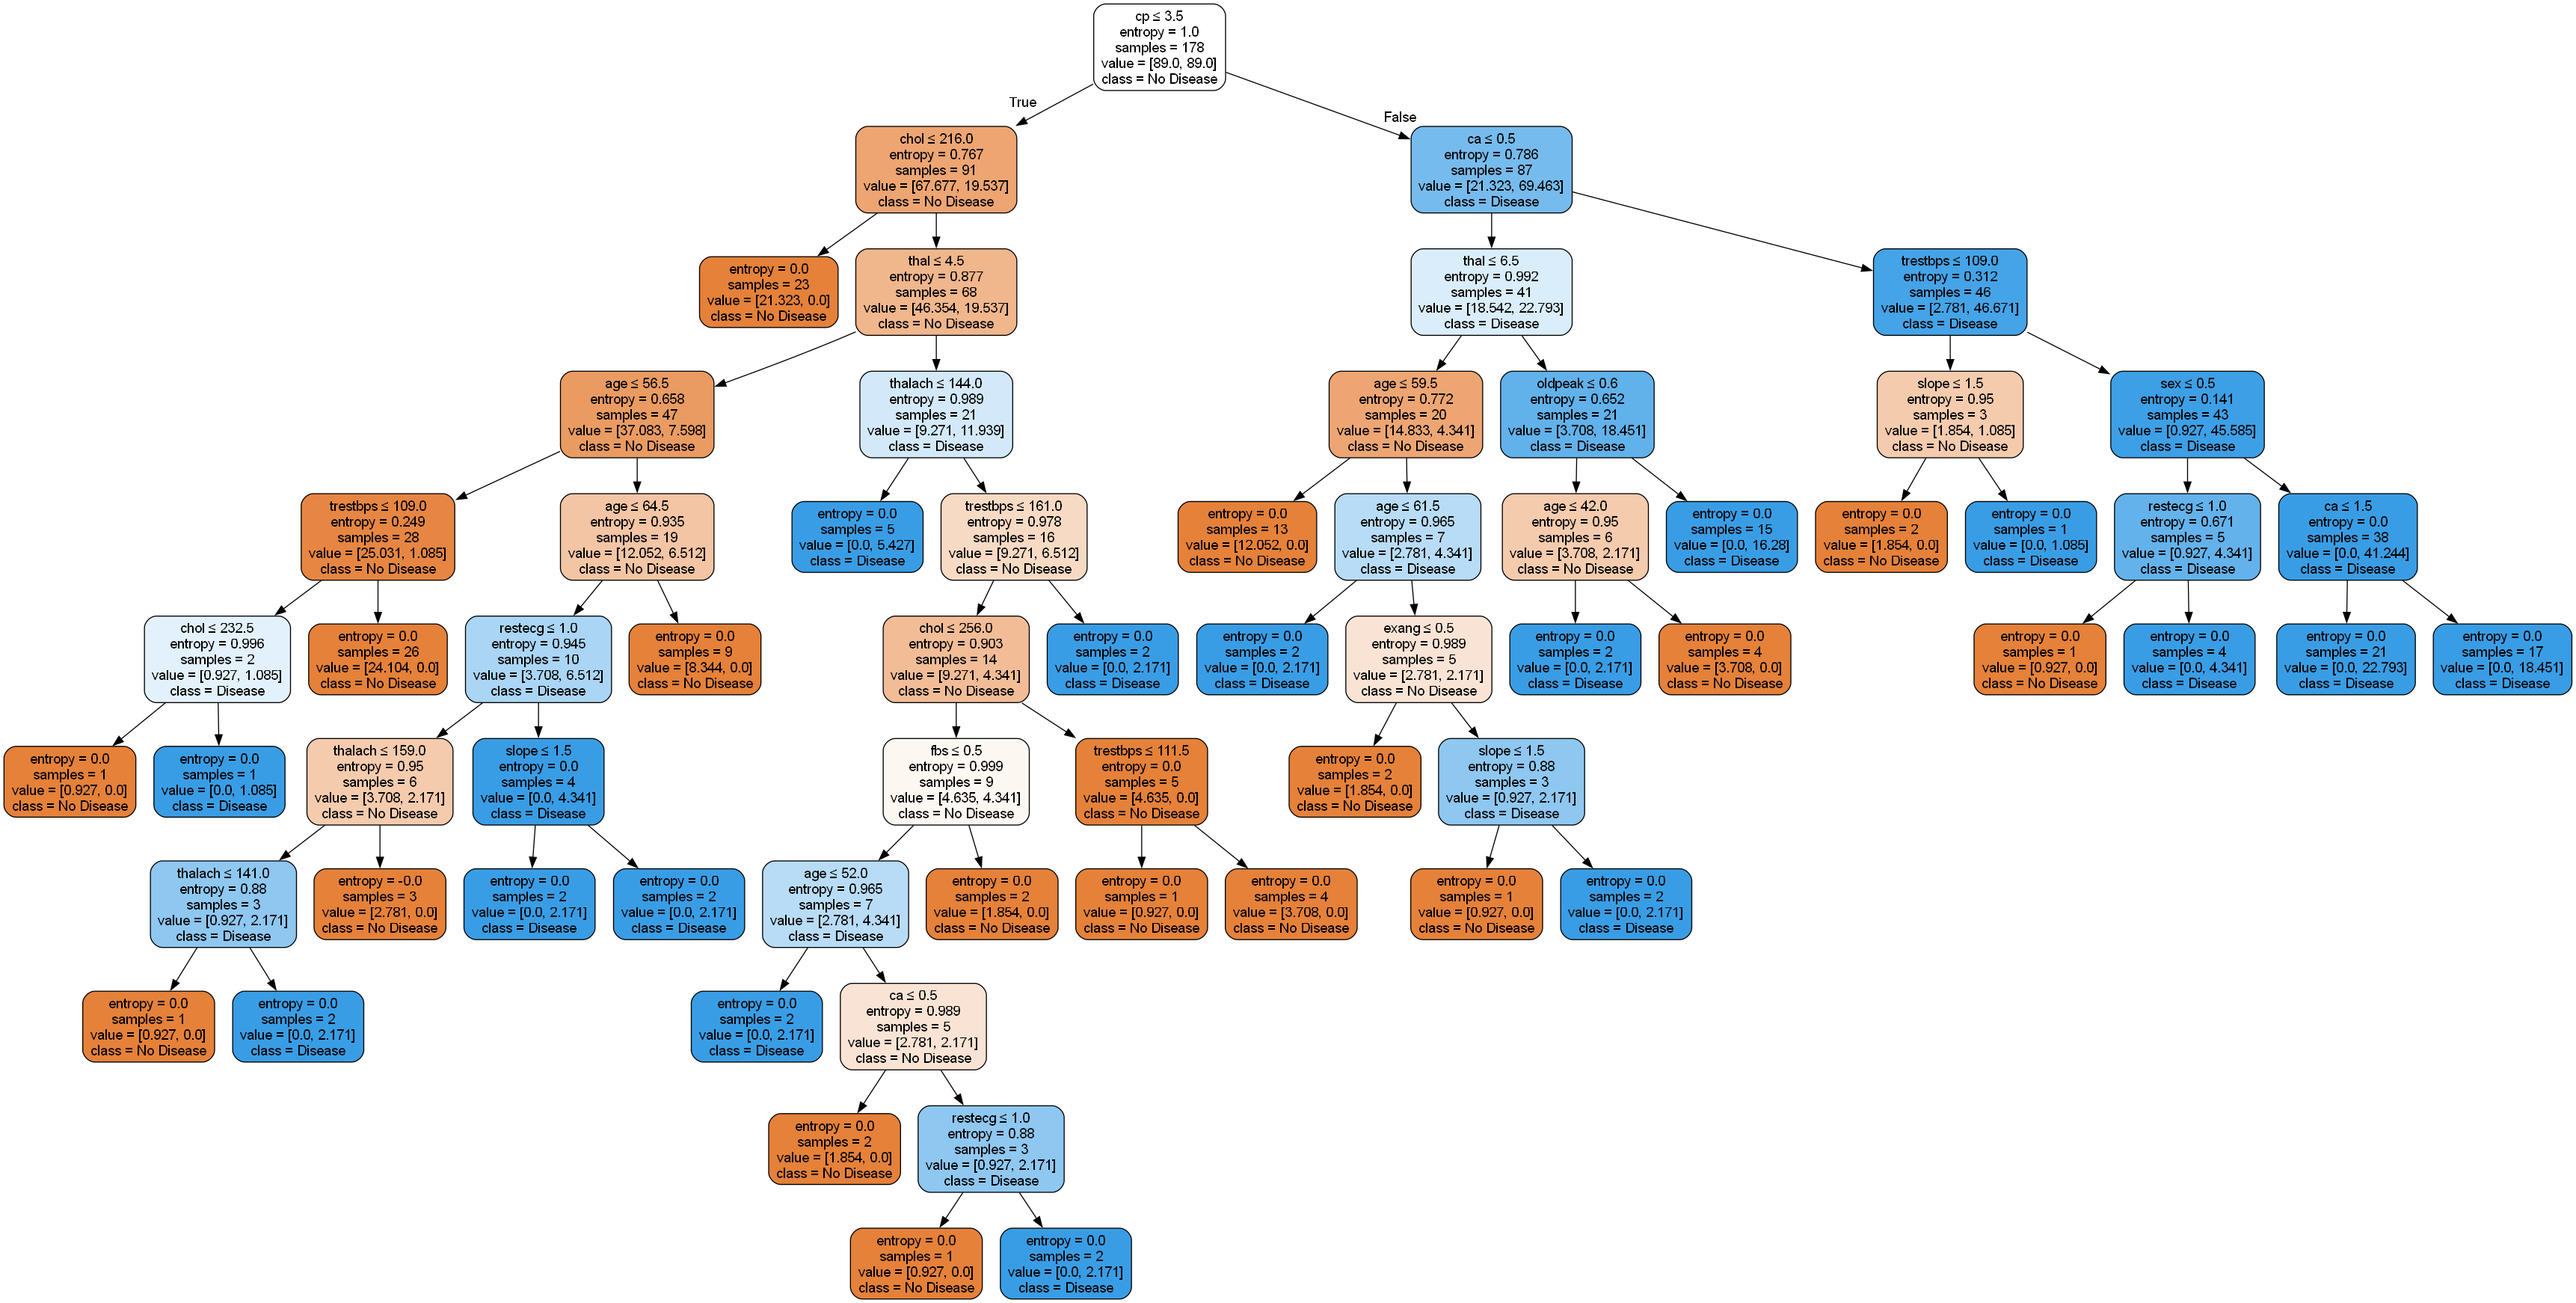

Accuracy for max_depth None: 0.7731
Decision tree of the model trained with split ratio 80/20 and max depth 2



(process:7236): Pango-CRITICAL **: 00:44:29.201: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:7236): Pango-CRITICAL **: 00:44:29.201: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:7236): Pango-CRITICAL **: 00:44:29.201: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:7236): Pango-CRITICAL **: 00:44:29.201: pango_font_description_get_family: assertion 'desc != NULL' failed


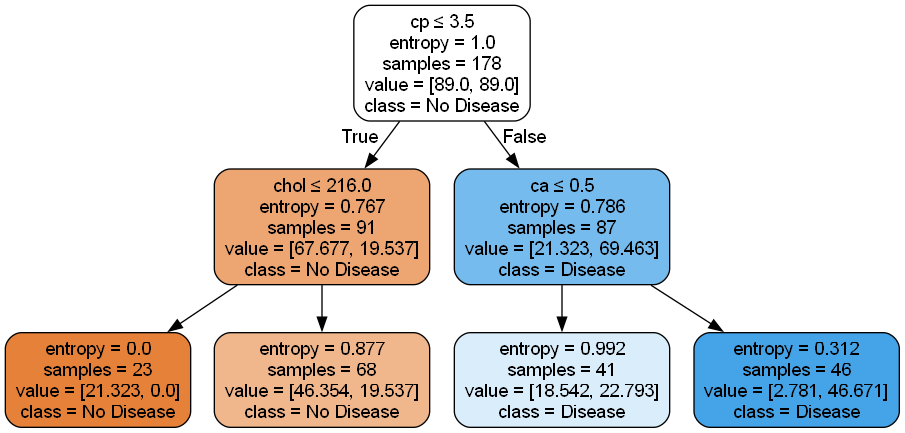

Accuracy for max_depth 2: 0.7311
Decision tree of the model trained with split ratio 80/20 and max depth 3



(process:13132): Pango-CRITICAL **: 00:44:30.074: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:13132): Pango-CRITICAL **: 00:44:30.074: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:13132): Pango-CRITICAL **: 00:44:30.074: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:13132): Pango-CRITICAL **: 00:44:30.074: pango_font_description_get_family: assertion 'desc != NULL' failed


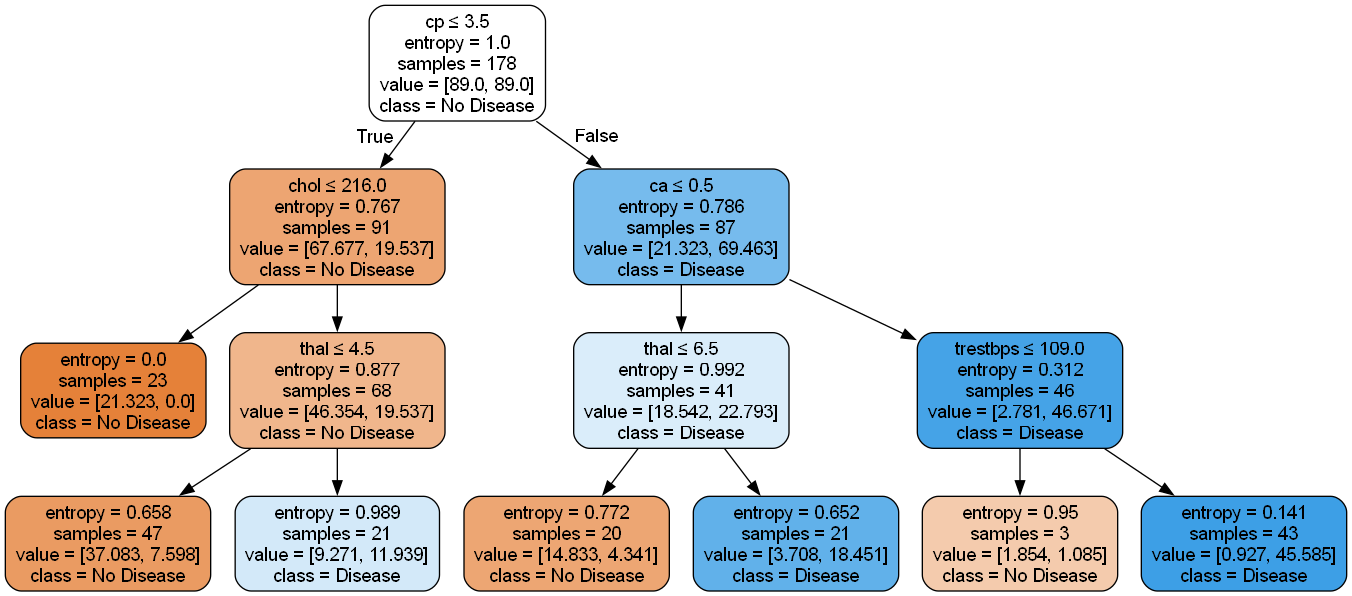

Accuracy for max_depth 3: 0.7983
Decision tree of the model trained with split ratio 80/20 and max depth 4



(process:10528): Pango-CRITICAL **: 00:44:31.096: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:10528): Pango-CRITICAL **: 00:44:31.097: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:10528): Pango-CRITICAL **: 00:44:31.097: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:10528): Pango-CRITICAL **: 00:44:31.097: pango_font_description_get_family: assertion 'desc != NULL' failed


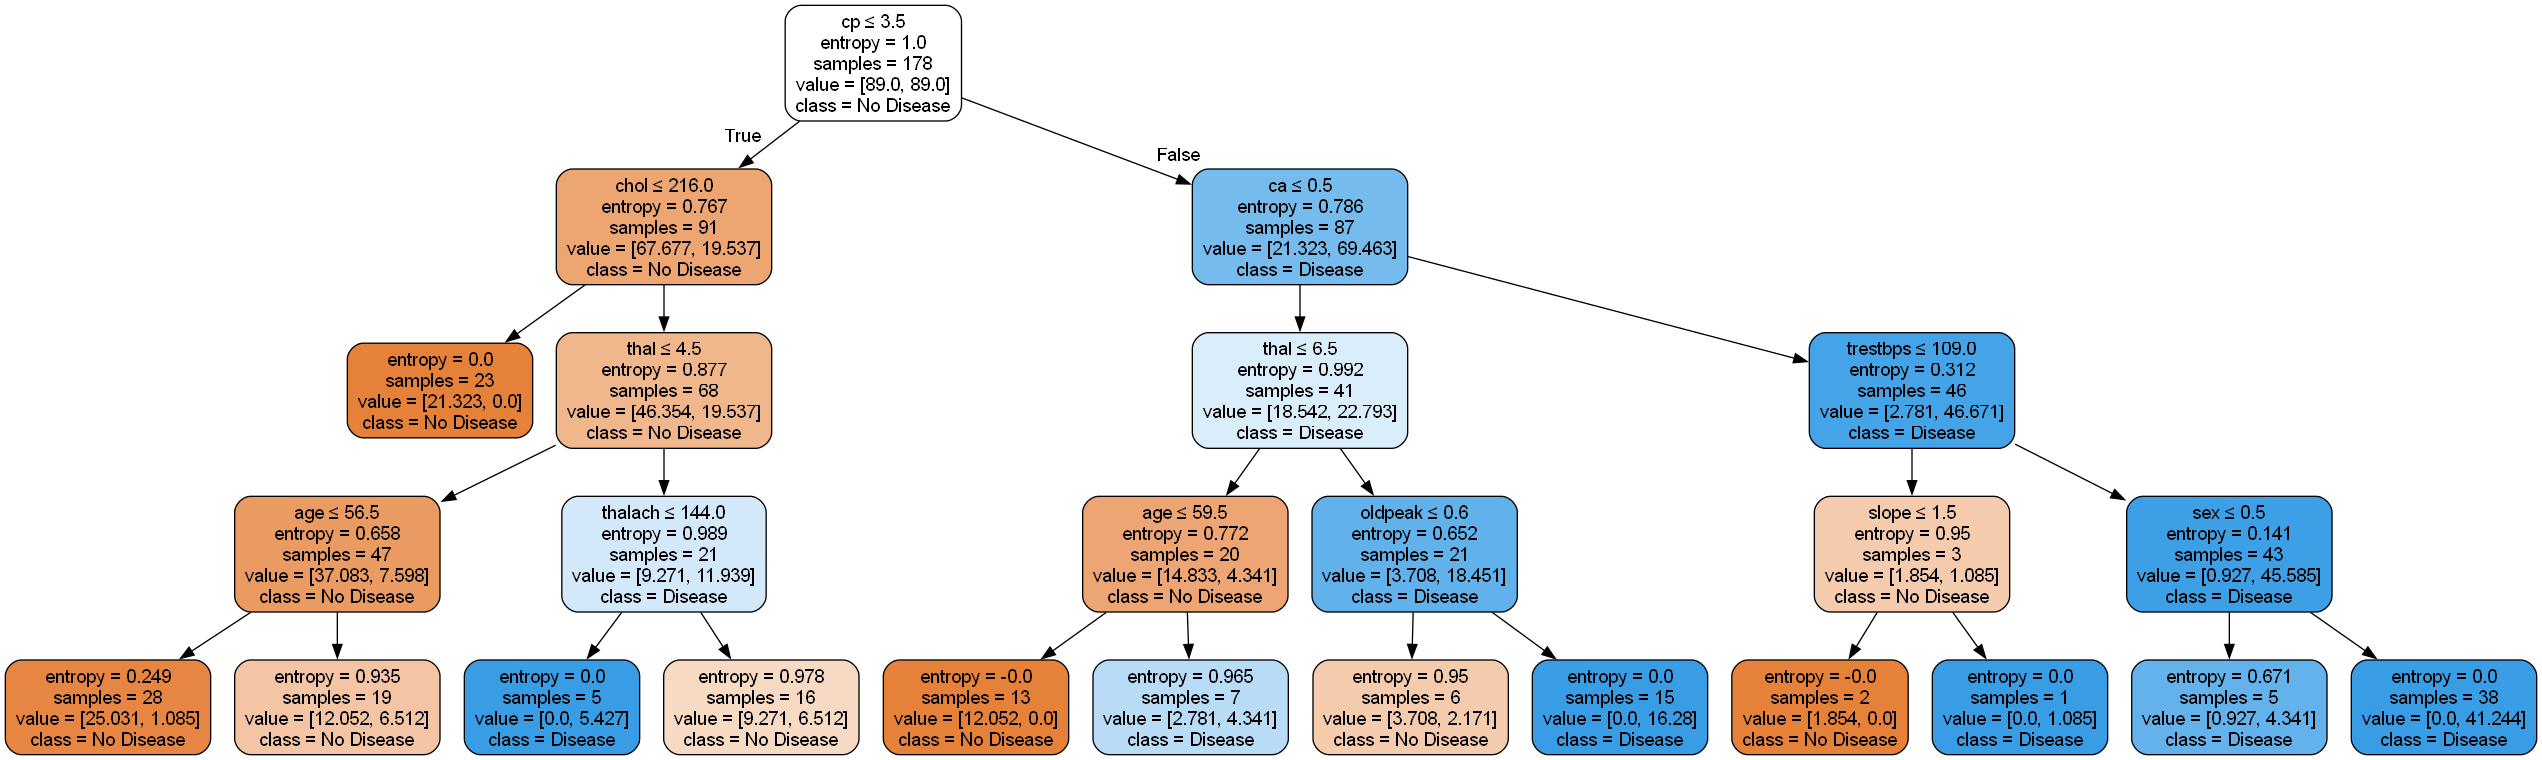

Accuracy for max_depth 4: 0.7815
Decision tree of the model trained with split ratio 80/20 and max depth 5



(process:23240): Pango-CRITICAL **: 00:44:32.017: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:23240): Pango-CRITICAL **: 00:44:32.019: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:23240): Pango-CRITICAL **: 00:44:32.020: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:23240): Pango-CRITICAL **: 00:44:32.020: pango_font_description_get_family: assertion 'desc != NULL' failed


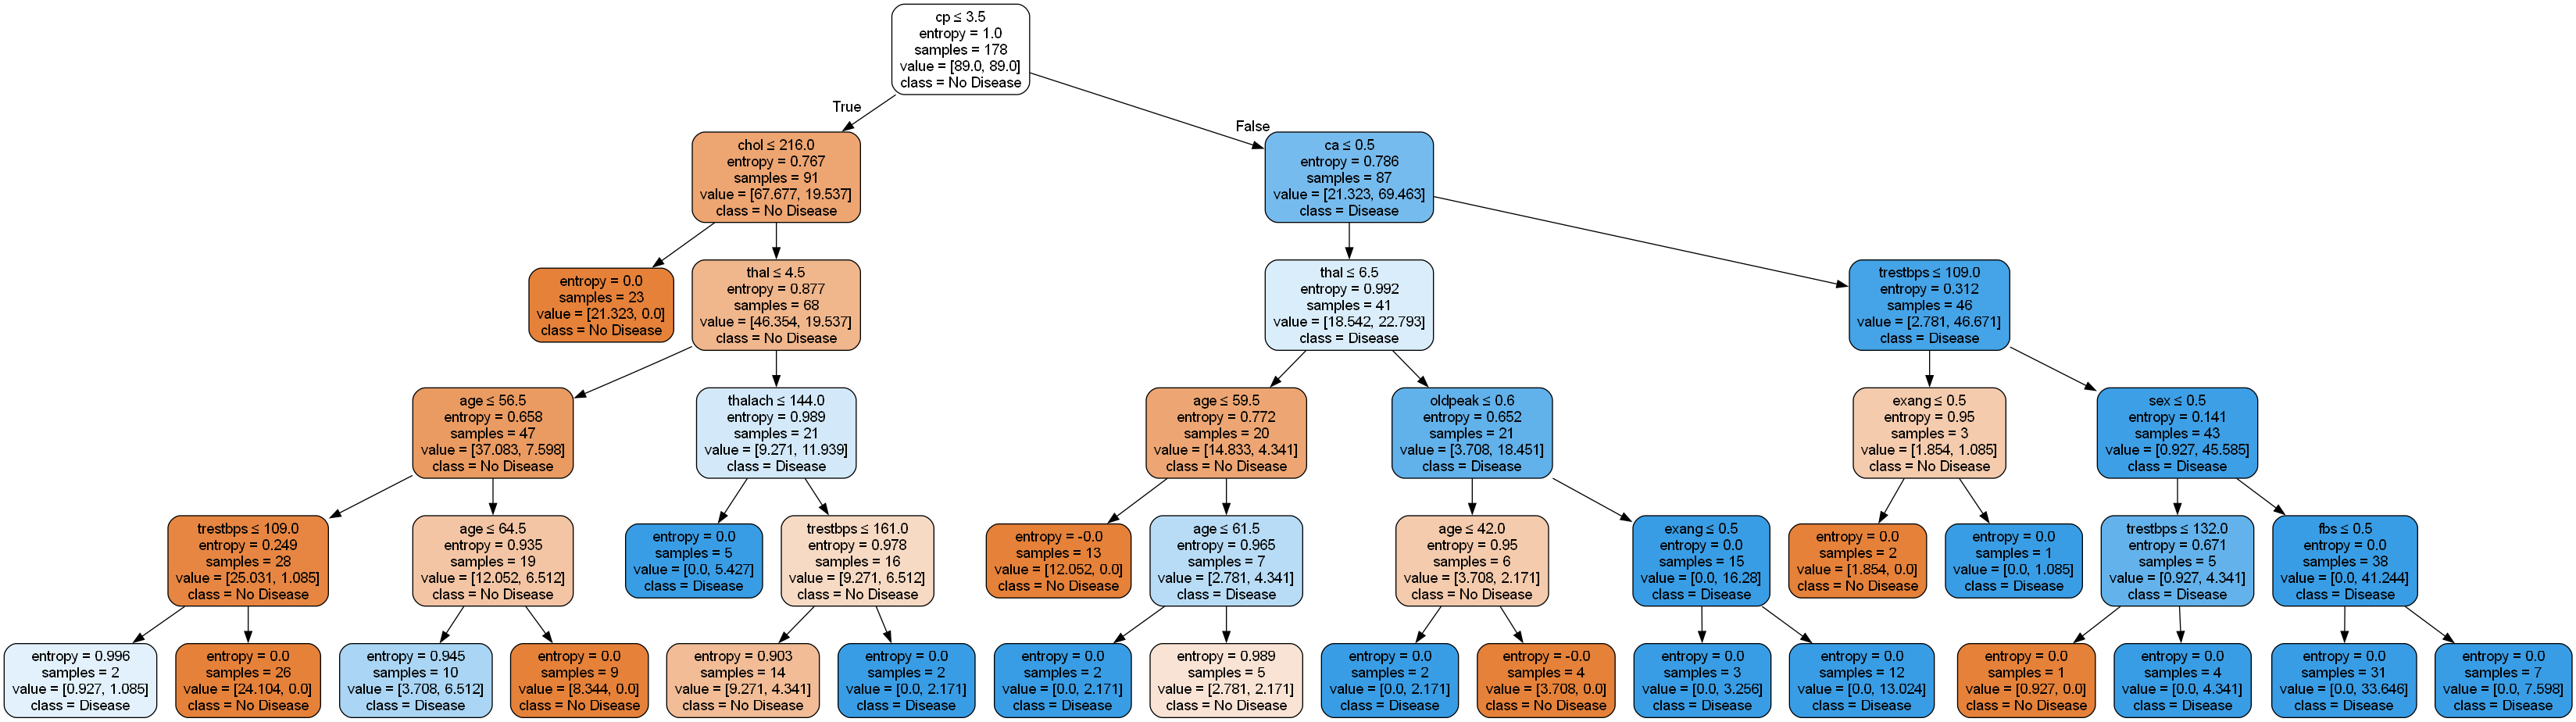

Accuracy for max_depth 5: 0.7731
Decision tree of the model trained with split ratio 80/20 and max depth 6



(process:13168): Pango-CRITICAL **: 00:44:33.050: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:13168): Pango-CRITICAL **: 00:44:33.050: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:13168): Pango-CRITICAL **: 00:44:33.050: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:13168): Pango-CRITICAL **: 00:44:33.050: pango_font_description_get_family: assertion 'desc != NULL' failed


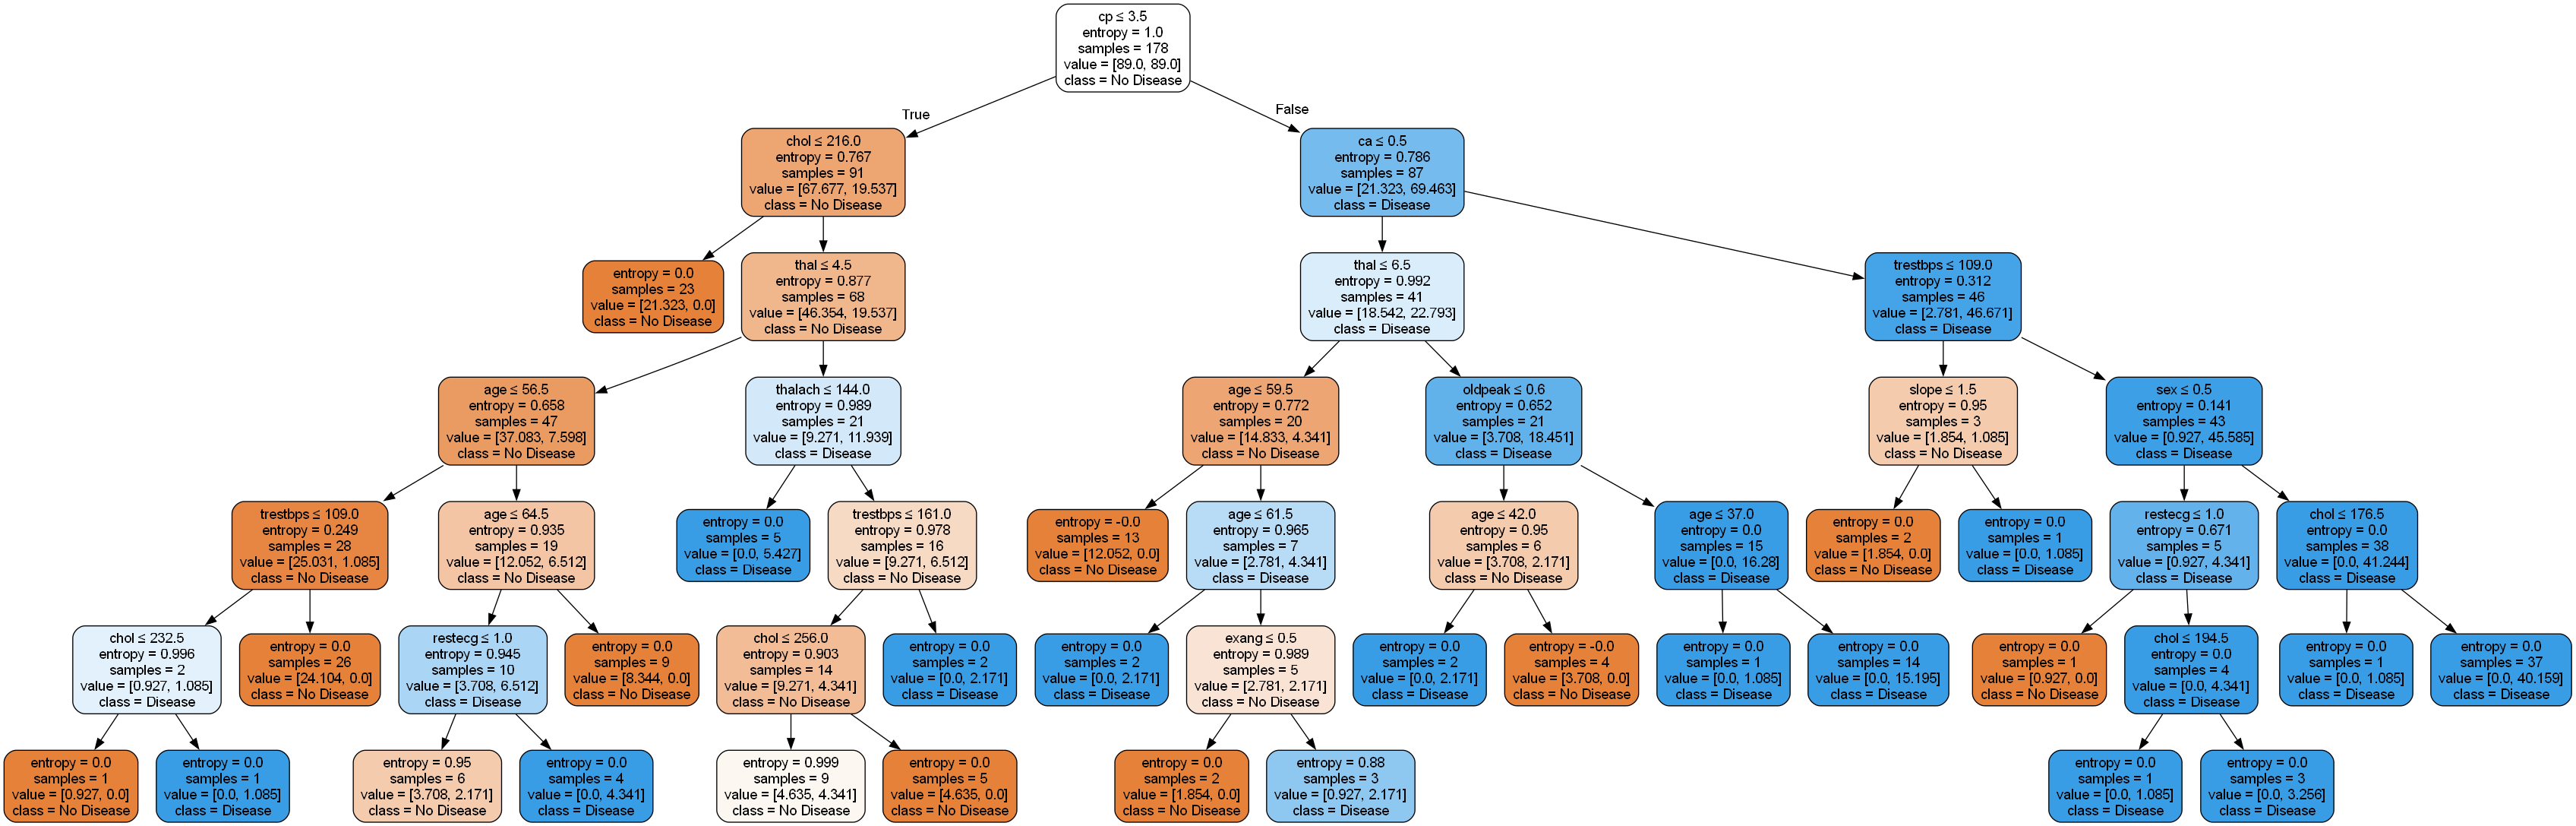

Accuracy for max_depth 6: 0.7563
Decision tree of the model trained with split ratio 80/20 and max depth 7



(process:14424): Pango-CRITICAL **: 00:44:34.080: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:14424): Pango-CRITICAL **: 00:44:34.080: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:14424): Pango-CRITICAL **: 00:44:34.080: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:14424): Pango-CRITICAL **: 00:44:34.080: pango_font_description_get_family: assertion 'desc != NULL' failed


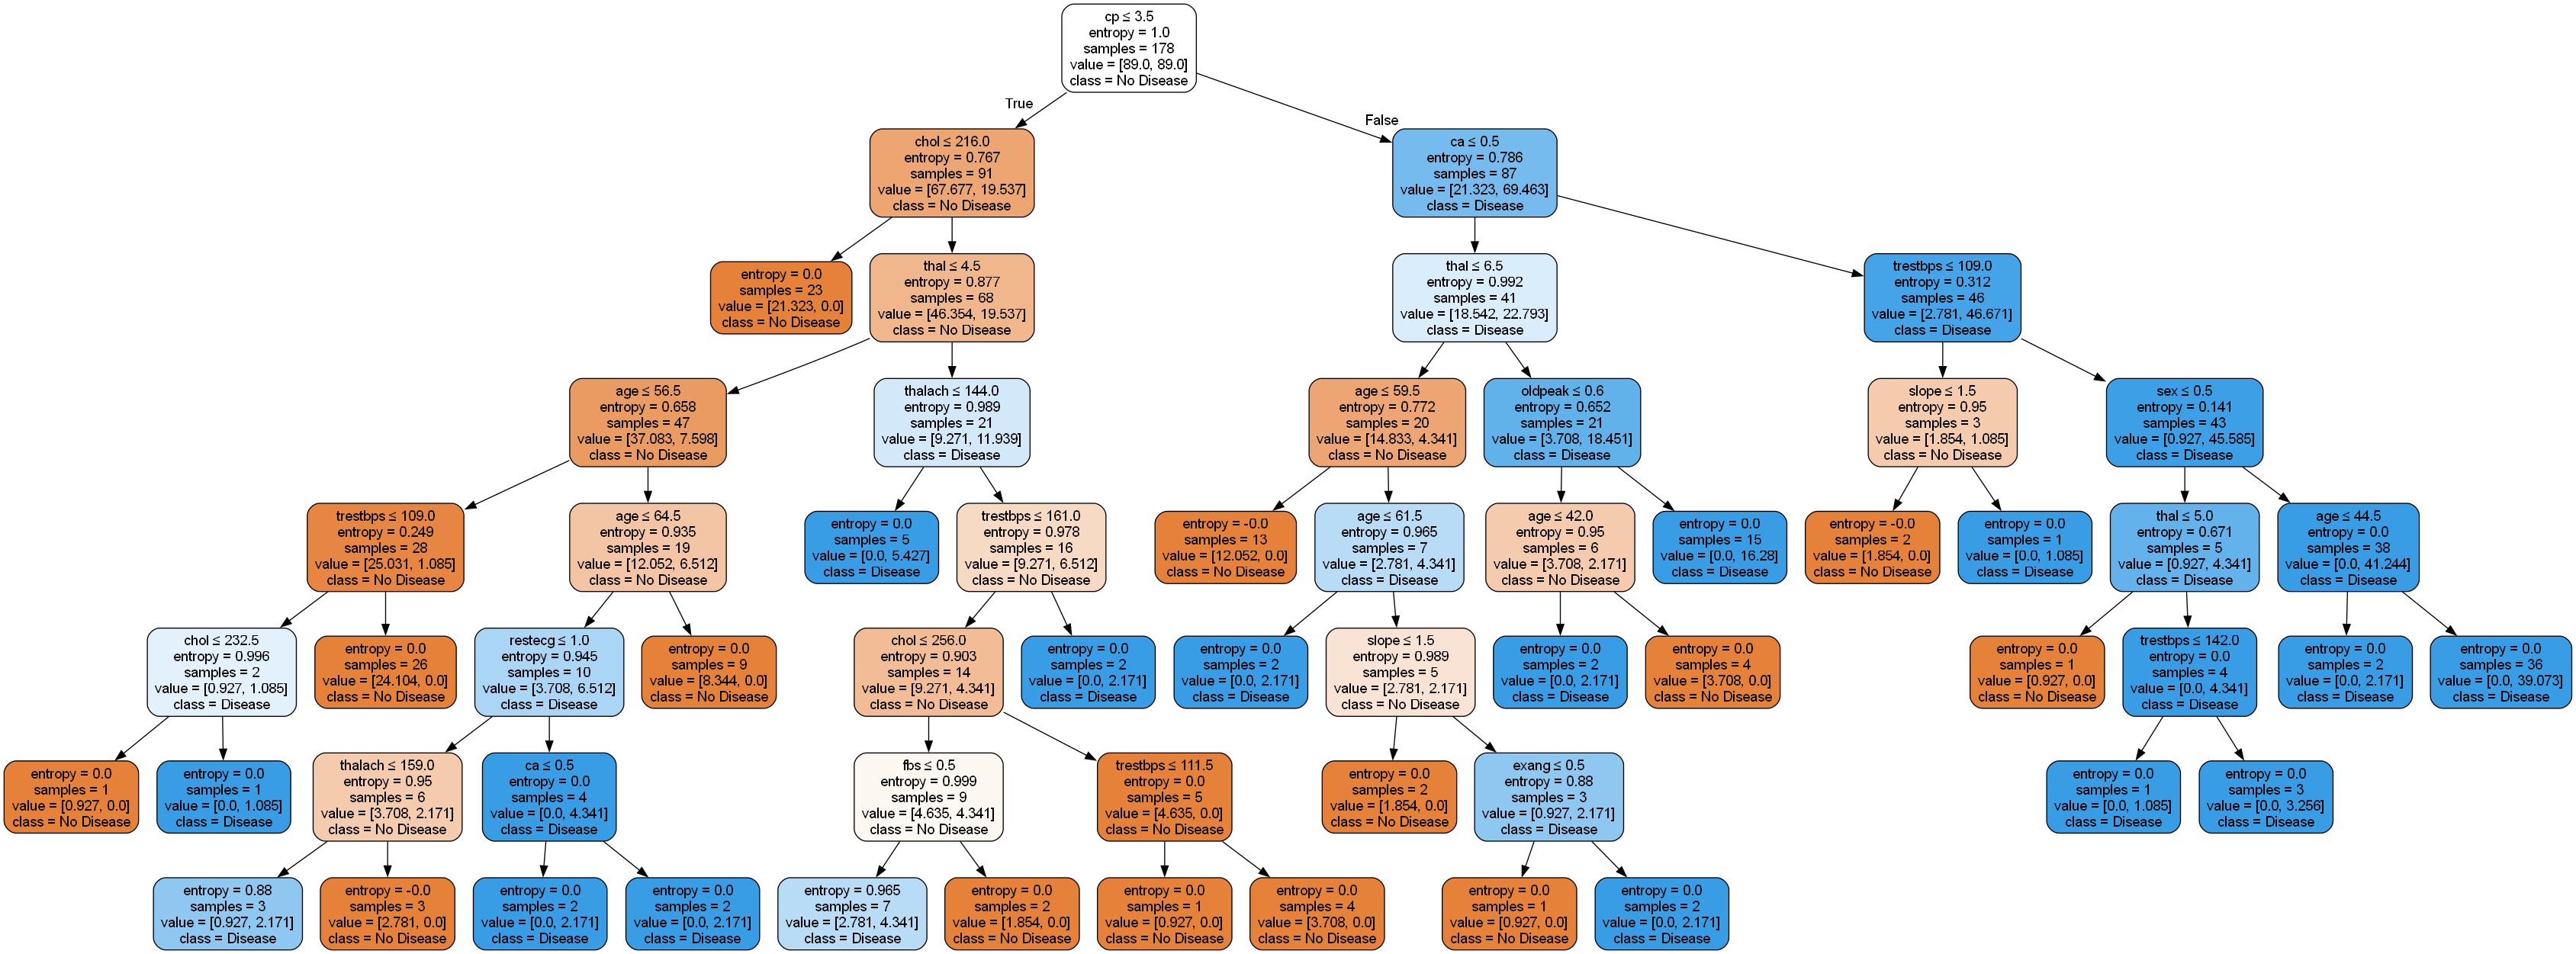

Accuracy for max_depth 7: 0.7815


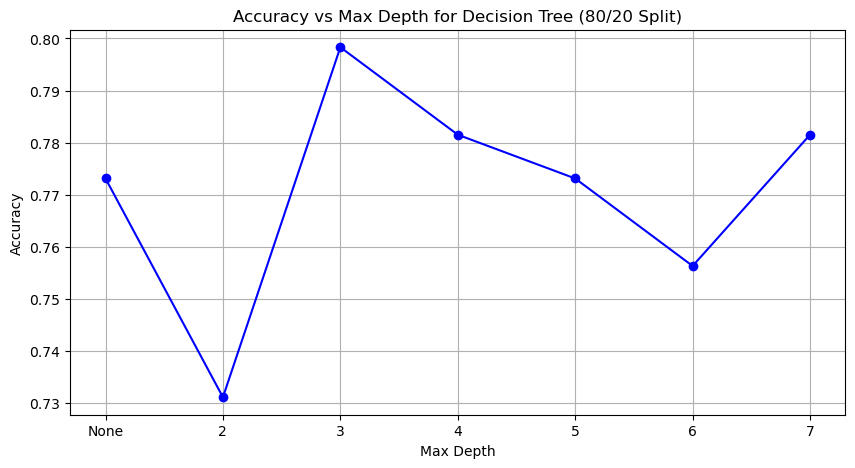

In [ ]:
# Select the 80/20 split (index 2 in split_ratios)
subset_80_20 = subsets[1]
feature_train_80_20 = subset_80_20['feature_train']
label_train_80_20 = subset_80_20['label_train']
feature_test_80_20 = subset_80_20['feature_test']
label_test_80_20 = subset_80_20['label_test']

accuracy_scores = []
depths = [None, 2, 3, 4, 5, 6, 7]

for depth in depths:
    model = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=depth, class_weight='balanced')
    model.fit(feature_train_80_20, label_train_80_20)

    print(f"Decision tree of the model trained with split ratio 80/20 and max depth {depth}")
    # Export the decision tree to DOT format
    dot_data = export_graphviz(
        model,
        out_file=None,
        feature_names=heart_disease.data.features.columns,
        class_names=class_names,
        filled=True,
        rounded=True,
        special_characters=True,
        fontname="Arial"
    )
    
    # Render the DOT file with Graphviz
    graph = Source(dot_data)
    # Visualize the tree
    graph.render(f"./tree_80_20/tree1/tree_{depth}", 
                 format='png', 
                 cleanup=True)
    display(Image(filename=f"./tree_80_20/tree1/tree_{depth}.png"))

    # Make predictions and calculate accuracy
    pred = model.predict(feature_test_80_20)
    accuracy = accuracy_score(label_test_80_20, pred)
    print(f"Accuracy for max_depth {depth}: {accuracy:.4f}")
    accuracy_scores.append(accuracy)

# Plot the results
depths_for_plot = [str(d) if d is not None else 'None' for d in depths]
plt.figure(figsize=(10, 5))
plt.plot(depths_for_plot, accuracy_scores, marker='o', linestyle='-', color='blue')
plt.title('Accuracy vs Max Depth for Decision Tree (60/40 Split)')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depths_for_plot)
plt.grid(True)
plt.show()